In [48]:
from geopandas import GeoDataFrame
import _pickle as cPickle
from shapely.geometry import Polygon, mapping
from shapely.geometry import Point 
import geopandas as gpd
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np
import folium as fo
import shapely as sh
import unicodedata as uco
import pysal as ps
from shapely.geometry import Point
from math import sin,cos,atan,acos,asin,atan2,sqrt,pi, modf
fiona.supported_drivers;
%matplotlib inline

In [49]:
kvartali = gpd.read_file('C:/Users/gery/Desktop/Hackathon/Naselenie_kvartali/Naselenie_kvartali.shp')
kvartali = kvartali.to_crs({'init': 'epsg:4326'})
kvartali['centroid'] = kvartali['geometry'].centroid

In [51]:
subway_stops = gpd.read_file('E:/Hackathon/Subway/Subway_stops/Subway_stops.shp')
subway_stops = subway_stops.to_crs({'init': 'epsg:4326'})


In [52]:
subway_stops.tail()

,Id,Sub_stop,Passengers,geometry
30,0,Александър Малинов,4277,POINT (23.37678759839688 42.64790650025313)
31,0,Александър Теодоров Балан,5931,POINT (23.37301950000165 42.64133970000001)
32,0,Бизнес парк,8934,POINT (23.37320720000166 42.62870430000001)
33,0,Ломско шосе,1559,POINT (23.28729640000126 42.7404865)
34,0,Сердика 2,11815,POINT (23.32193270000145 42.698365)


In [90]:
def get_distance(point1, point2):
    return ((point1.x - point2.x)**2 + (point1.x - point2.x)**2)**.5

def nearest_subway_stop_distance(centroid):
    subway_distances = [getDistanceByHaversine(centroid, subway_stop) for subway_stop in subway_stops.geometry]
    return  min(subway_distances)

def nearest_subway_stop_name(centroid):
    return 3


kvartali['subway_distance'] = kvartali.centroid.apply(nearest_subway_stop_distance)
kvartali['log_subway_distance'] = kvartali.subway_distance.apply(np.log)

In [86]:
earthradius = 6371.0

def to_rad(x):
    return x*pi/180

def getDistanceByHaversine(point1, point2):
    "Haversine formula - give coordinates as (lat_decimal,lon_decimal) tuples"

    lat1, lon1 = point1.x,  point1.y
    lat2, lon2 = point2.x, point2.y
    # convert to radians
    lon1 = lon1 * pi / 180.0
    lon2 = lon2 * pi / 180.0
    lat1 = lat1 * pi / 180.0
    lat2 = lat2 * pi / 180.0

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2.0))**2
    c = 2.0 * atan2(sqrt(a), sqrt(1.0-a))
    km = earthradius * c
    return km

In [53]:
subway_distance_plot = kvartali.plot(column= 'centroid', cmap='coolwarm', legend=True,figsize=(10, 10));


TypeError: unhashable type: 'Point'

In [43]:
kvartali[kvartali.RegName.str.contains('Витоша')]

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,Educ2,Educ3,Educ4,Educ5,Area_m2,X,Y,geometry,centroid,subway_distance
100,Планина Витоша - р-н Витоша,Витоша,С.ВЛАДАЯ,20,18,10,10,6,0,4,...,3,0,0,0,7.685533e+07,684902.694225,4.719647e+06,"POLYGON ((681984.8833836459 4723922.849735305,...",POINT (684902.6942250005 4719647.281724331),4.816762
107,кв. Витоша - Лозенец,Лозенец,ГР.СОФИЯ,4132,4164,2071,2061,742,495,1149,...,822,102,126,337,1.877846e+06,691001.543299,4.724086e+06,"POLYGON ((690332.9943158414 4723802.243708231,...",POINT (691001.5432991339 4724085.962233602),4.658240
108,м. Витоша - ВЕЦ Симеоново,Студентска,ГР.СОФИЯ,2981,2132,1461,1520,516,431,787,...,798,111,153,280,4.858359e+05,691623.927940,4.724775e+06,"POLYGON ((691632.0379812008 4723846.385697907,...",POINT (691623.9279403555 4724775.050512233),6.218380
481,Планина Витоша - р-н Панчарево,Панчарево,С.ЖЕЛЕЗНИЦА,1,1,0,1,0,0,0,...,0,0,0,0,4.295146e+07,691025.800123,4.713493e+06,"POLYGON ((692248.8411485112 4717557.808907218,...",POINT (691025.8001229927 4713492.840001307),4.264734


In [45]:
kvartali.crs

{'init': 'epsg:32634'}

In [47]:
kvartali.head()

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,Educ2,Educ3,Educ4,Educ5,Area_m2,X,Y,geometry,centroid,subway_distance
0,Зона за отдих Шишмановски манастир,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,6.520429e+05,716220.394138,4.701659e+06,"POLYGON ((23.61444963639586 42.43907487722348,...",POINT (716220.3941380234 4701658.889909182),10.160521
1,в.з. Татарски брод,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,4.722835e+05,709933.138737,4.701578e+06,"POLYGON ((23.54344794040258 42.43635256319397,...",POINT (709933.1387374651 4701577.646921773),9.739217
2,"Панчарево, в.з.Лавандулите",Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,4.528326e+05,711336.648877,4.702379e+06,"POLYGON ((23.56776269927294 42.4379242037833, ...",POINT (711336.6488773811 4702378.756299005),9.849829
3,Манастир Св. Илия,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,1.408295e+05,715154.742684,4.706243e+06,"POLYGON ((23.6144678311679 42.47922548848631, ...",POINT (715154.7426835455 4706242.957558583),10.100480
4,"Панчарево, в.з. Щъркелово гнездо",Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,2.055968e+06,709588.733528,4.704446e+06,"POLYGON ((23.5503287502318 42.47313372204871, ...",POINT (709588.7335280926 4704445.845973233),9.710096


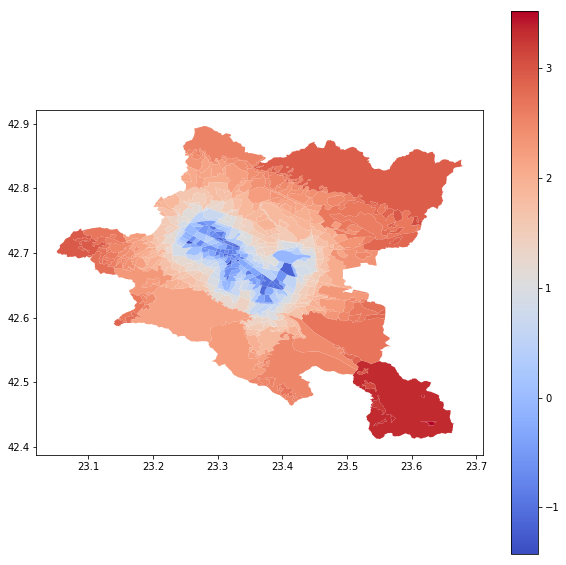

In [91]:
subway_distance_plot = kvartali.plot(column= 'log_subway_distance', cmap='coolwarm', legend=True,figsize=(10, 10))


In [37]:
kvartali.to_csv("C:/Users/gery/Desktop/Hackathon/kvartali_subway_distance.csv") 
